In [1]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 7.0 MB/s 


In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

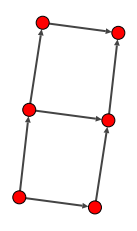

In [59]:
graph = ig.Graph([(0,1),(0,3),(1,2),(2,5),(3,4),(3,2),(4,5)], directed = True)

graph.es()['custo'] = [20,10,30,20,15,10,20]

graph.es()['weight'] = [50,40,60,30,60,70,50]

graph.vs()['nome'] = ['s', 'a', 'b', 'c', 'd','t']

ig.plot(graph, target=plt.axes())
plt.axis('off')
plt.show()

In [60]:
def bellman_ford(graph, initial):

  nb_vertices = len(graph.vs)

  rote = [0] * nb_vertices
  dist = [np.inf] * nb_vertices
  dist[initial] = 0

  for edge in graph.es:
    edge_weight = graph.es.select(_source=edge.source, _target=edge.target)['weight'][0]
    if dist[edge.target] > dist[edge.source] + edge_weight:
      dist[edge.target] = dist[edge.source] + edge_weight
      rote[edge.target] = edge.source

  return dist, rote
  

In [61]:
# Codigo ta bem triste ;-;
# Mal otimizado e ordenado. Deve dar pra fazer esse algoritmo em muito menos linhas de código

def ford_cust(f_graph, source, target):
  graph = f_graph.copy()
  while(True): 
    dist, rote = bellman_ford(graph, source) 

    if dist[target] == np.inf: break
    
    edges = list()
    index = target
    while(index != source):
      edges.append((rote[index],index))
      index = rote[index]

    min_flux = np.inf; min_edge = tuple()
    for edge in edges:
      if min_flux > graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]:
        min_flux = graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]
        min_edge = (edge[0], edge[1])

    for edge in edges:
      if edge == min_edge:
        ct_e = graph.es().select(_source = edge[0], _target = edge[1])['custo'][0]
        graph.delete_edges(edge)
        graph.add_edge(source = edge[1], target = edge[0])
        graph.es[-1]['weight'] = -1 * min_flux * ct_e 
        graph.es[-1]['custo'] = ct_e
        continue
      
      wt_e = graph.es().select(_source = edge[0], _target = edge[1])['weight'][0]
      ct_e = graph.es().select(_source = edge[0], _target = edge[1])['custo'][0]
      graph.delete_edges(edge)
      graph.add_edge(source = edge[0], target = edge[1])
      graph.es[-1]['weight'] = (wt_e - min_flux) * -1 * ct_e 
      graph.es[-1]['custo'] = ct_e
      graph.add_edge(source = edge[1], target = edge[0])
      graph.es[-1]['weight'] = min_flux * ct_e
      graph.es[-1]['custo'] = ct_e

  cut = 0
  incidents = graph.neighbors(target, mode="out")
  for v in incidents:
    cut += graph.es().select(_source = target, _target = v)['weight'][0]

  # Custo x distancia data
  return cut

In [62]:
ford_cust(graph, 0, 5)

200